<a href="https://colab.research.google.com/github/sungreong/TIL/blob/master/bow_and_tf_idf_korea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




## Text Data 

https://github.com/lovit/textmining_dataset

## Mecab 설치

https://colab.research.google.com/drive/1tL2WjfE0v_es4YJCLGoEJM5NXs_O_ytW#scrollTo=1lxZgy_vjaah


In [0]:
!pip install konlpy
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3
!apt-get update -qq
!apt-get install fonts-nanum* -qq
from IPython.display import clear_output
clear_output()

In [0]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
from matplotlib import font_manager, rc
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

sys_font number: 47
nanum_font number: 31
NanumGothic Eco


In [0]:
import konlpy
import re
from konlpy.tag import *
import numpy as np
from konlpy.utils import pprint
import json
import os
from pprint import pprint
import re
import nltk


kkm = Kkma()
pprint(kkm.sentences(u'네, 안녕하세요. 반갑습니다.'))
sentence = u'테스트가 필요합니다.'
words = konlpy.tag.Twitter().pos(sentence)
print(words)

['네, 안녕하세요.', '반갑습니다.']


/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('테스트', 'Noun'), ('가', 'Josa'), ('필요합니다', 'Adjective'), ('.', 'Punctuation')]



```
#!git clone https://github.com/lovit/textmining-dataset.git
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"
```


```
from lovit_textmining_dataset import version_check
from lovit_textmining_dataset import fetch
version_check()
fetch(dataset='navermovie_comments')
from lovit_textmining_dataset.navermovie_comments import load_movie_comments
idxs, texts, rates = load_movie_comments(idxs='134963')
corpus_path = 'lalaland_comments.txt'
with open('lalaland_comments.txt', 'w', encoding='utf-8') as f:
    for text in texts:
        f.write('{}\n'.format(text.strip()))

```

## Data Load

In [0]:
!ls

lalaland_comments.txt  sample_data


In [0]:
with open('lalaland_comments.txt', 'r', encoding='utf-8') as f:
    lines = f.read().splitlines()

In [0]:
okt = Okt()

In [0]:
okt.pos("스터디를 참석하겠습니다." , join = True , stem=True , norm = True)

['스터디/Noun', '를/Josa', '참석/Noun', '하다/Verb', './Punctuation']

## 명사만 추출하기

In [0]:
from collections import Counter
noun_counter = Counter(
    [noun for text in lines for noun in okt.nouns(text)]
)

In [0]:
for min_count in [2, 3, 5, 10]:
    _counter = {
        word for word, freq in noun_counter.items()
        if freq >= min_count
    }
    print('num of nouns (min_count = %d): %d' % (
        min_count, len(_counter)))

num of nouns (min_count = 2): 3493
num of nouns (min_count = 3): 2487
num of nouns (min_count = 5): 1729
num of nouns (min_count = 10): 1067


In [0]:

noun_dict = {
    word for word, freq in noun_counter.items()
    if freq >= 2
}

def custom_tokenizer(doc):
    return [word for word in okt.nouns(doc) if word in noun_dict]

print(okt.nouns(lines[0]))
print(custom_tokenizer(lines[0]))

['시사회', '동화', '재즈', '뮤지컬', '만남']
['시사회', '동화', '재즈', '뮤지컬', '만남']


In [0]:
def remove(x) :
    m = re.sub(r'(?:\b[0-9a-zA-Zㄱ-ㅎㅏ-ㅣ]\b|[?!\W]+)\s*', ' ', x).strip() 
    m = " ".join(m.split())
    return m

def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(remove(doc), norm=True, stem=True) if t[1] in ['Noun','Adjective']]


## remove 함수 

1. 특수기호 제거
2. 영어, 숫자 사이에 공백이 있는 한글자들 제거 
    * ex1) 
        * **처리전** 1.기계학습을 이용한 머신러닝이 중요하다. 2.통계기반 학습이 필요하다.
        * **처리후** 기계학습을 이용한 머신러닝이 중요하다. 통계기반 학습이 필요하다.
    * ex2) 글자사이에 공백이 있는 경우만 제거 
        * 총 3건 -> 총 3건
        * 총 3 간 -> 총 건
        


3. 양끝 공백제거 / 중간에 공백은 1개로 처리 
4.  한글 자음 모음 제거

## okt.pos 함수 
* norm : 정규화 
* stem : 어간 추출
* 품사 태깅

In [0]:
processing_lines = [tokenize(line) for line in lines]

In [0]:
processing_lines[0:1]

[['시사회/Noun',
  '동화/Noun',
  '재즈/Noun',
  '뮤지컬/Noun',
  '만남/Noun',
  '지루하다/Adjective',
  '재밌다/Adjective']]

In [0]:

tokens = [t for d in processing_lines for t in d ]
text = nltk.Text(tokens, name='영화리뷰')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 20개
pprint(text.vocab().most_common(20))

138496
7383
[('영화/Noun', 9133),
 ('관람객/Noun', 8393),
 ('좋다/Adjective', 3515),
 ('음악/Noun', 2234),
 ('있다/Adjective', 1647),
 ('같다/Adjective', 1630),
 ('꿈/Noun', 1517),
 ('아름답다/Adjective', 1378),
 ('마지막/Noun', 1286),
 ('없다/Adjective', 1207),
 ('최고/Noun', 1170),
 ('사랑/Noun', 1105),
 ('노래/Noun', 1059),
 ('재밌다/Adjective', 1056),
 ('인생/Noun', 1028),
 ('정말/Noun', 1012),
 ('것/Noun', 1007),
 ('현실/Noun', 909),
 ('여운/Noun', 877),
 ('생각/Noun', 873)]


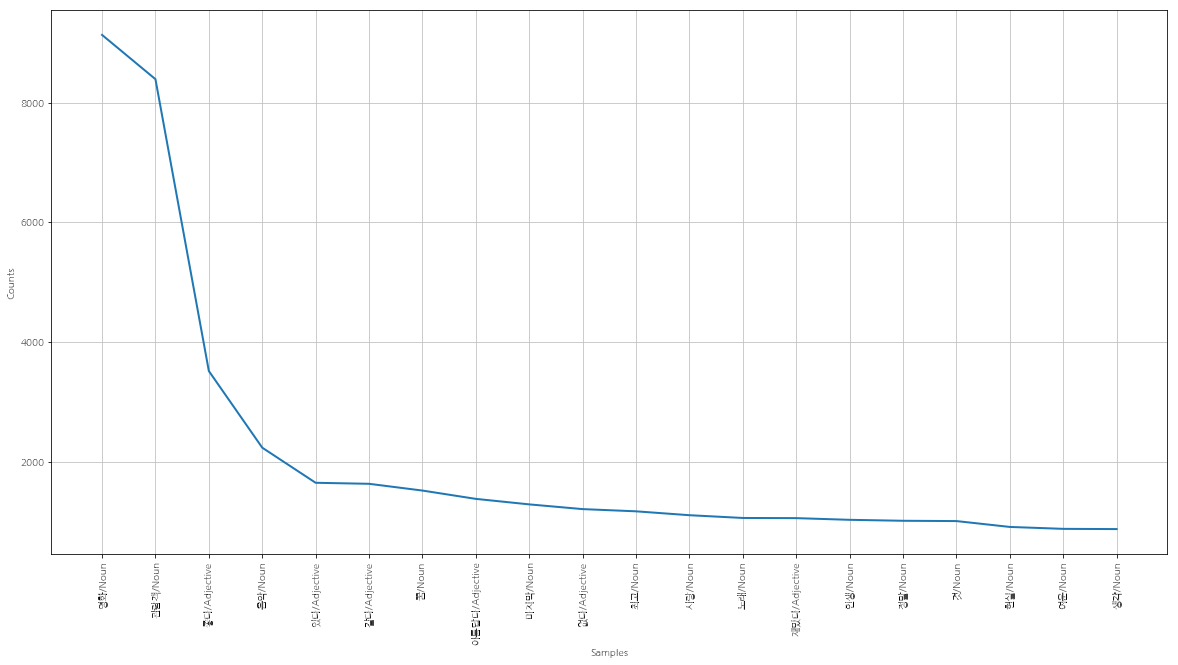

In [0]:
plt.figure(figsize=(20,10))
text.plot(20)

In [0]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

bow = [term_frequency(d) for d in processing_lines]

In [0]:
np.asarray(bow).astype('float32').shape

(15599, 7383)

In [0]:
np.sum(np.asarray(bow)[0:1,:])

7

In [0]:
processing_lines[0:1]

[['시사회/Noun',
  '동화/Noun',
  '재즈/Noun',
  '뮤지컬/Noun',
  '만남/Noun',
  '지루하다/Adjective',
  '재밌다/Adjective']]

## Bag of Word

In [0]:
import pandas as pd
pd.DataFrame(np.asarray(bow) , columns = selected_words).head(1)

,영화/Noun,관람객/Noun,좋다/Adjective,음악/Noun,있다/Adjective,같다/Adjective,꿈/Noun,아름답다/Adjective,마지막/Noun,없다/Adjective,최고/Noun,사랑/Noun,노래/Noun,재밌다/Adjective,인생/Noun,정말/Noun,것/Noun,현실/Noun,여운/Noun,생각/Noun,뮤지컬/Noun,스토리/Noun,감동/Noun,지루하다/Adjective,아니다/Adjective,영상/Noun,장면/Noun,이/Noun,이다/Adjective,더/Noun,사람/Noun,보고/Noun,슬프다/Adjective,그/Noun,수/Noun,진짜/Noun,결말/Noun,내/Noun,처음/Noun,상미/Noun,...,반항/Noun,낄낄/Noun,차질레/Noun,비평/Noun,주변인/Noun,거임/Noun,상술/Noun,도감/Noun,핫/Noun,승부/Noun,별보/Noun,때완/Noun,수천/Noun,티증/Noun,송녕회때/Noun,부서/Noun,필모/Noun,디운/Noun,유재석/Noun,나날/Noun,홀림/Noun,기반/Noun,거란/Noun,해피해피/Noun,맘애/Noun,몸핏오지/Noun,무디/Noun,떫어/Noun,끝맛/Noun,핵추/Noun,청해/Noun,기성/Noun,곡성/Noun,허리우드/Noun,셀브르/Noun,빗장/Noun,빼기/Noun,열거/Noun,제작비/Noun,지지리/Noun
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
(pd.DataFrame(np.asarray(bow) , columns = selected_words).head(1)[processing_lines[0:1][0]])

,시사회/Noun,동화/Noun,재즈/Noun,뮤지컬/Noun,만남/Noun,지루하다/Adjective,재밌다/Adjective
0,1,1,1,1,1,1,1


## CountVectorizor 사용

In [0]:
vectorizer = CountVectorizer(
    tokenizer= tokenize ,
    min_df=0.005,
    max_df=0.95
)

x_sparse = vectorizer.fit_transform(lines)
x_sparse.shape

(15599, 263)

In [0]:
d = pd.DataFrame(x_sparse.toarray(), columns = vectorizer.get_feature_names()).head(1)
d.loc[:,(d>0).values.tolist()[0]]

,동화/Noun,뮤지컬/Noun,재밌다/Adjective,재즈/Noun,지루하다/Adjective
0,1,1,1,1,1


## TF-IDF로 변환하기

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
tf_idf_X = transformer.fit_transform(x_sparse)

In [0]:
d = pd.DataFrame(tf_idf_X.toarray(), columns = vectorizer.get_feature_names()).head(1)
d.loc[:,(d>0).values.tolist()[0]]

,동화/Noun,뮤지컬/Noun,재밌다/Adjective,재즈/Noun,지루하다/Adjective
0,0.561098,0.399836,0.377975,0.462993,0.409967


In [0]:
from collections import defaultdict

def get_ngram_counter(docs, min_count=10, n_range=(1,3)):

    def remove(x) :
        m = re.sub(r'(?:\b[0-9a-zA-Zㄱ-ㅎㅏ-ㅣ]\b|[?!\W]+)\s*', ' ', x).strip() 
        m = " ".join(m.split())
        return m
    
    def tokenize(doc):
        # norm은 정규화, stem은 근어로 표시하기를 나타냄
        return ['/'.join(t) for t in okt.pos(remove(doc), norm=True, stem=True ) if t[1] in ['Noun','Adjective']]

    def to_ngrams(words, n):
        ngrams = []
        for b in range(0, len(words) - n + 1):
            ngrams.append(tuple(words[b:b+n]))
        return ngrams

    n_begin, n_end = n_range
    ngram_counter = defaultdict(int)
    for doc in docs:
        words = okt.pos(doc , norm=True, stem=True , join = True) # tokenize(doc)
        for n in range(n_begin, n_end + 1):
            for ngram in to_ngrams(words, n):
                ngram_counter[ngram] += 1

    ngram_counter = {
        ngram:count for ngram, count in ngram_counter.items()
        if count >= min_count
    }

    return ngram_counter

In [0]:
class NgramTokenizer:

    def __init__(self, ngrams, base_tokenizer, n_range=(1, 3)):
        self.ngrams = ngrams
        self.base_tokenizer = base_tokenizer
        self.n_range = n_range

    def __call__(self, sent):
        return self.tokenize(sent)

    def tokenize(self, sent):
        if not sent:
            return []

        unigrams = self.base_tokenizer.pos(sent , norm=True, stem=True, join = True)

        n_begin, n_end = self.n_range
        ngrams = []
        for n in range(n_begin, n_end + 1):
            for ngram in self._to_ngrams(unigrams, n):
                ngrams.append('-'.join(ngram))
        return ngrams

    def _to_ngrams(self, words, n):
        ngrams = []
        for b in range(0, len(words) - n + 1):
            ngram = tuple(words[b:b+n])
            if ngram in self.ngrams:
                ngrams.append(ngram)
        return ngrams


## unigram : 단어 1개씩 확인
## bigram : 단어 2개씩 확인

In [0]:
ngram_counter = get_ngram_counter(lines , n_range=(1,2))

## Unigram

In [0]:
ngram_tokenizer = NgramTokenizer(ngram_counter, okt, n_range = (1,1))
ngram_tokenizer(lines[0])

['시사회/Noun',
 '에서/Josa',
 '보고오다/Verb',
 '동화/Noun',
 '와/Josa',
 '재즈/Noun',
 '뮤지컬/Noun',
 '의/Josa',
 '만남/Noun',
 '지루하다/Adjective',
 '않다/Verb',
 '재밌다/Adjective']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    tokenizer = ngram_tokenizer,
    lowercase = False,
    stop_words = ["영화/Noun", '관람객/Noun']
)
x = vectorizer.fit_transform(lines)
x.shape

(15599, 1954)

In [0]:
(pd.DataFrame(x.toarray() , columns = vectorizer.get_feature_names()).head(1)
[ngram_tokenizer(lines[0])])

,시사회/Noun,에서/Josa,보고오다/Verb,동화/Noun,와/Josa,재즈/Noun,뮤지컬/Noun,의/Josa,만남/Noun,지루하다/Adjective,않다/Verb,재밌다/Adjective
0,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
transformer = TfidfTransformer()
tf_idf_unigram_X = transformer.fit_transform(x)
(pd.DataFrame(tf_idf_unigram_X.toarray(),
             columns = vectorizer.get_feature_names()).head(1)
             [ngram_tokenizer(lines[0])])

,시사회/Noun,에서/Josa,보고오다/Verb,동화/Noun,와/Josa,재즈/Noun,뮤지컬/Noun,의/Josa,만남/Noun,지루하다/Adjective,않다/Verb,재밌다/Adjective
0,0.440936,0.22202,0.37791,0.313503,0.235528,0.258689,0.223401,0.152124,0.423895,0.229062,0.207324,0.211187


## Bigram

In [0]:
ngram_tokenizer = NgramTokenizer(ngram_counter, okt, n_range = (2,2))
ngram_tokenizer(lines[0])

['뮤지컬/Noun-의/Josa', '지루하다/Adjective-않다/Verb']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(
    tokenizer = ngram_tokenizer,
    lowercase = False,
)
x = vectorizer.fit_transform(lines)
x.shape

(15599, 2897)

In [0]:
(pd.DataFrame(x.toarray(), 
              columns = vectorizer.get_feature_names()).head(1)
              [ngram_tokenizer(lines[0])])

,뮤지컬/Noun-의/Josa,지루하다/Adjective-않다/Verb
0,1,1


## Bigram TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
tf_idf_bigram_X = transformer.fit_transform(x)

In [0]:
(pd.DataFrame(tf_idf_bigram_X.toarray(),
             columns = vectorizer.get_feature_names()).head(1)
             [ngram_tokenizer(lines[0])])

,뮤지컬/Noun-의/Josa,지루하다/Adjective-않다/Verb
0,0.751302,0.659959


In [0]:
import pickle 
with open("lalaland_comment_rates.pkl", "rb") as r :
    rates = pickle.load(r)

In [0]:
label = np.where(np.array( rates ) > 5 , 1 ,0 )

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import cross_val_score , ShuffleSplit
from sklearn import metrics
from sklearn.metrics import roc_curve , roc_auc_score , f1_score , classification_report
from sklearn.model_selection import train_test_split

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn.linear_model import LogisticRegression 

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
cv = ShuffleSplit(n_splits=3  , test_size=0.3, random_state=42)

In [0]:
pipe_lr = Pipeline([('clf', LogisticRegression(random_state=42))])
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=42 ,))])
pipe_gbm = Pipeline([('clf', GBM(n_estimators  = 1000 , random_state = 42))])

In [0]:
depth_range = [5,7,9]
min_samples_split_range = [0.5, 0.7 , 0.9]
param_range = [0.5, 0.1]
param_range_fl = np.logspace(0,-5,2)

grid_params_lr = [{'clf__penalty': ['l2'],
                   'clf__C': [0.5 ],
                   'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': depth_range,
                   'clf__min_samples_split': min_samples_split_range }]

grid_params_gbm = [{"clf__tol" : param_range_fl , 
                    'clf__max_depth': depth_range,
                    'clf__min_samples_leaf': param_range,
                    'clf__loss' : ["deviance", "exponential"],
                   } ]

In [0]:
pipe = [
    pipe_lr , pipe_rf , pipe_gbm 
       ]
params = [
    grid_params_lr , grid_params_rf ,  grid_params_gbm , 
]

In [0]:
jobs = 20


In [0]:
from sklearn.metrics import roc_curve
def ModelCurve(X_train ,y_train  , X_test , y_test , title ) :     
    grid_dict = {0: 'Logistic Regression', 
                1: 'Random Forest', 
                2: "GradientBoostingClassifer" 
                }
    plt.style.use('ggplot')
    fig , ax = plt.subplots(figsize= (20,10))
    plt.plot([0, 1], [0, 1], linestyle='--')
    for idx , (param , model) in enumerate(zip(params , pipe)) :
        search = GridSearchCV(model, param, iid=True , 
                            cv=cv , n_jobs=jobs , verbose=-1 )
        search.fit(X_train , y_train)
        y_pred = search.predict(X_test)
        try :
            y_prob = search.predict_proba(X_test)
        except Exception as e :
            pass
        AUC = np.mean(y_test == np.round(y_prob[:,1]).astype(int))
        fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
        plt.plot(fpr, tpr, marker='.', label =  "AUC : {:.2f} , {}".format(AUC, grid_dict[idx])   )
    plt.legend(fontsize = 20 , loc='center', shadow=True )
    plt.title(title , fontsize= 25)
    plt.show()

In [0]:
bi_X_train, bi_X_test, bi_y_train, bi_y_test = train_test_split(
    tf_idf_bigram_X , label , test_size=0.4, random_state=0)


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done 108 out of 108 | elapsed:    1.9s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:  1.5min
[Parallel(n_jobs=20)]: Done  72 out of  72 | elapsed:  3.2min finished


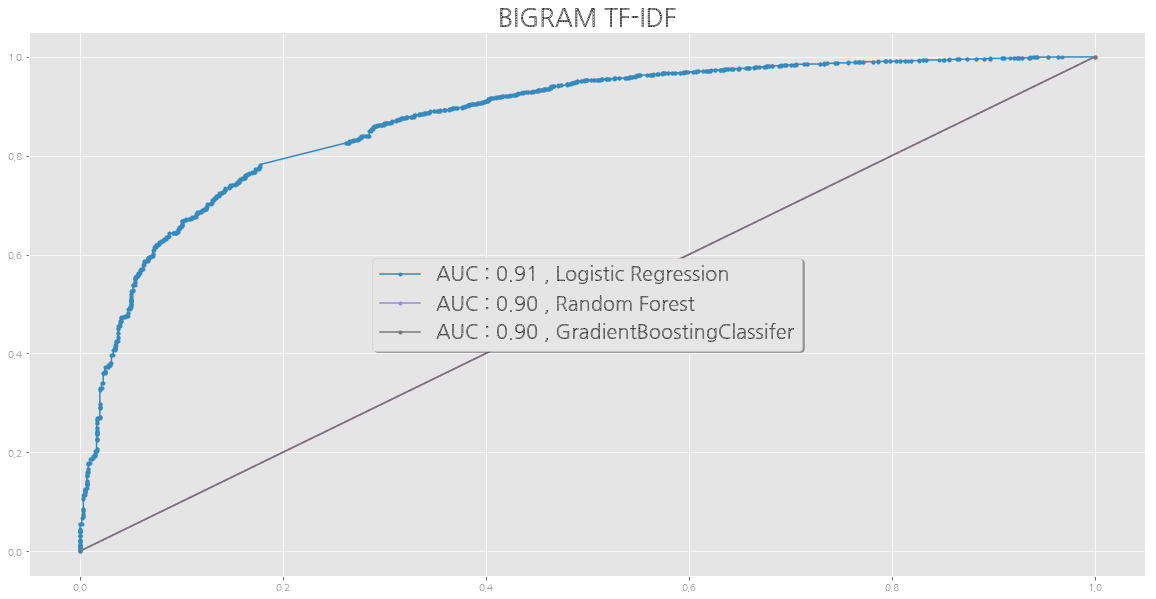

In [0]:
ModelCurve(bi_X_train ,bi_y_train  , bi_X_test , bi_y_test, "BIGRAM TF-IDF")

In [0]:
uni_X_train, uni_X_test, uni_y_train, uni_y_test =\
 train_test_split(tf_idf_unigram_X , label , test_size=0.4, random_state=0) 

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   3 out of   3 | elapsed:    6.5s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    4.5s
[Parallel(n_jobs=20)]: Done 108 out of 108 | elapsed:    7.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:  6.5min
[Parallel(n_jobs=20)]: Done  72 out of  72 | elapsed: 12.3min finished


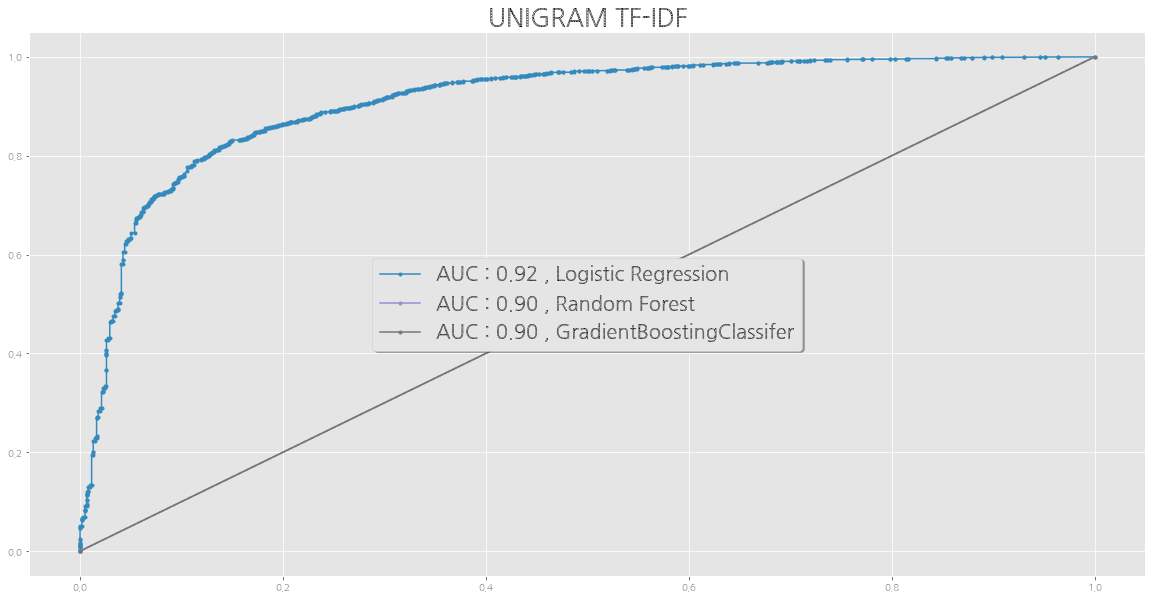

In [0]:
ModelCurve(uni_X_train ,uni_y_train  , uni_X_test , uni_y_test, "UNIGRAM TF-IDF")